In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
X = df.drop(['charges'], axis=1)
y = df['charges']

In [6]:
# Encoding features:
from sklearn.preprocessing import LabelEncoder # importing Label Encoder modules
lben = LabelEncoder() # create object for Label Encoder 
X_en = X.select_dtypes(include='object')
for col in X_en:
    X[col]= lben.fit_transform(X[col]) # Encoding all object features in dataset by label encoder
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
mvrls = LinearRegression(normalize=True)
mvrls.fit(X_train, y_train)
y_pred = mvrls.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('r2 score = ', score)
print('mean squared error is = ', mse)
print('root mean squared error is = ', rmse)
print('coef = ', mvrls.coef_)
print('intercept = ', mvrls.intercept_)

r2 score =  0.7613126015198817
mean squared error is =  33530131.141361605
root mean squared error is =  5790.520800529224
coef =  [  241.21435603    65.15704604   364.76476396   498.86281184
 23440.62938897  -340.60649259]
intercept =  -12302.677857742829


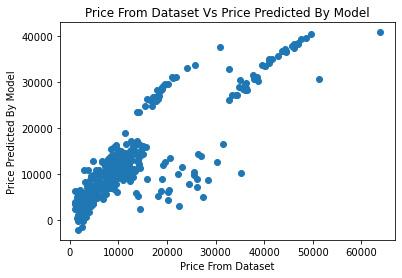

In [9]:
plt.scatter(y_test, y_pred)
plt.xlabel('Price From Dataset')
plt.ylabel('Price Predicted By Model')
plt.rcParams["figure.figsize"] = (16,10) 
plt.title("Price From Dataset Vs Price Predicted By Model")
plt.show();